In [1]:
from supplementary import *

%load_ext autoreload
%autoreload 2

In [2]:
N = 10
num_feature = 50

## Dataset and problem statement

In [3]:
data_train, data_test, label_train, label_test = load_data()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


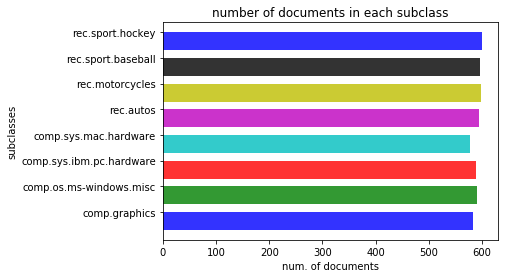

In [4]:
# part (a) plot the pre-balanced data
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
plot_hist(categories, data_train)

## Modeling text data and feature extraction

In [5]:
# part (b) modeling text data and feature extraction
print("----------modeling text data----------")
X_train, X_test = TFxIDF(data_train, data_test)
print("training set: #documents: %d, #terms: %d" % (X_train.shape[0], X_train.shape[1]))
print("test set: #documents: %d, #terms: %d" % (X_test.shape[0], X_test.shape[1]))

----------modeling text data----------
training set: #documents: 4732, #terms: 10786
test set: #documents: 3150, #terms: 10786


### Feature selection via LSI

In [6]:
# part (d) feature selection
print("----------feature selection via LSI----------")
U_k = lsi(X_train, num_feature)
Dk_train = U_k.T * X_train.T
Dk_test = U_k.T * X_test.T
print("dim-reduced training set: # terms: %d, # docs: %d" % (Dk_train.shape[0], Dk_train.shape[1]))
print("dim-reduced test set: # terms: %d, # docs: %d" % (Dk_test.shape[0], Dk_test.shape[1]))

----------feature selection via LSI----------
dim-reduced training set: # terms: 50, # docs: 4732
dim-reduced test set: # terms: 50, # docs: 3150


### Feature selection via NMF

In [7]:
print("----------feature selection via NMF----------")
NMF_train, NMF_test = nmf(X_train, X_test, num_feature)
print("dim-reduced training set: # terms: %d, # docs: %d" % (NMF_train.shape[0], NMF_train.shape[1]))
print("dim-reduced test set: # terms: %d, # docs: %d" % (NMF_test.shape[0], NMF_test.shape[1]))

----------feature selection via NMF----------
dim-reduced training set: # terms: 50, # docs: 4732
dim-reduced test set: # terms: 50, # docs: 3150


## Learning algorithms

### Hard-margin SVM with LSI data

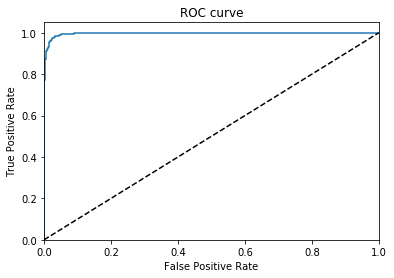

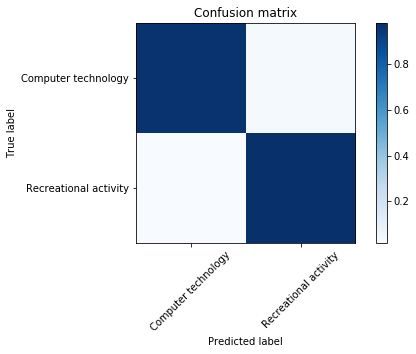

Normalized confusion matrix
[[ 0.97  0.03]
 [ 0.02  0.98]]
                       precision    recall  f1-score   support

  Computer technology       0.98      0.97      0.97      1560
Recreational activity       0.97      0.98      0.97      1590

          avg / total       0.97      0.97      0.97      3150



In [8]:
_ = svm(Dk_train, label_train, Dk_test, label_test, gamma=1000.0, flag=1)

### Hard-margin SVM with NMF data

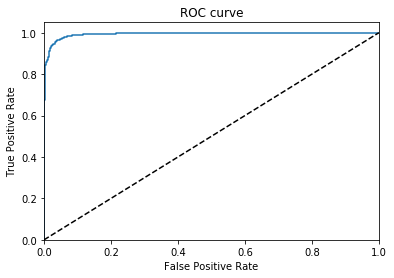

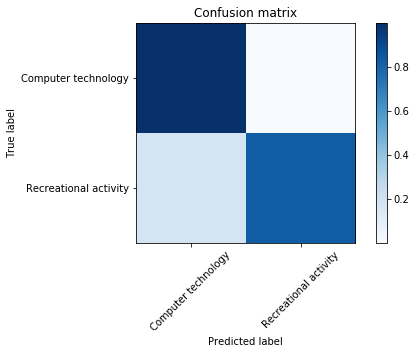

Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.18  0.82]]
                       precision    recall  f1-score   support

  Computer technology       0.85      1.00      0.92      1560
Recreational activity       1.00      0.82      0.90      1590

          avg / total       0.92      0.91      0.91      3150



In [9]:
_ = svm(NMF_train, label_train, NMF_test, label_test, gamma=1000.0, flag=1)

### Soft-margin SVM with LSI data

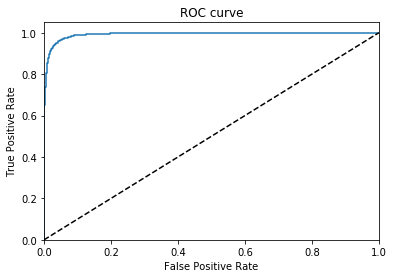

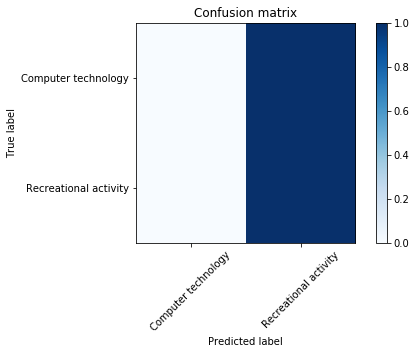

Normalized confusion matrix
[[ 0.  1.]
 [ 0.  1.]]
                       precision    recall  f1-score   support

  Computer technology       0.00      0.00      0.00      1560
Recreational activity       0.50      1.00      0.67      1590

          avg / total       0.25      0.50      0.34      3150



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
_ = svm(Dk_train, label_train, Dk_test, label_test, gamma=0.001, flag=1)

### Soft-margin SVM with NMF data

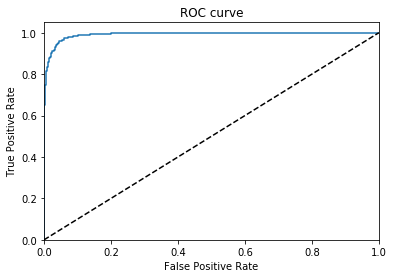

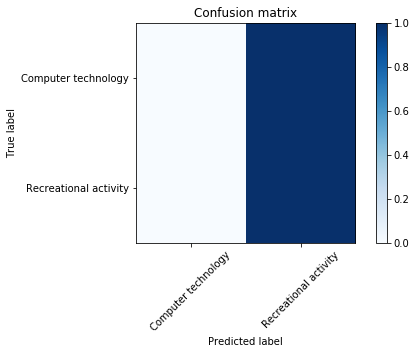

Normalized confusion matrix
[[ 0.  1.]
 [ 0.  1.]]
                       precision    recall  f1-score   support

  Computer technology       0.00      0.00      0.00      1560
Recreational activity       0.50      1.00      0.67      1590

          avg / total       0.25      0.50      0.34      3150



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
_ = svm(NMF_train, label_train, NMF_test, label_test, gamma=0.001, flag=1)

### Hyperparameter tuning for SVM with LSI data

Iteration k=-3
Iteration k=-2
Iteration k=-1
Iteration k=0
Iteration k=1
Iteration k=2
Iteration k=3


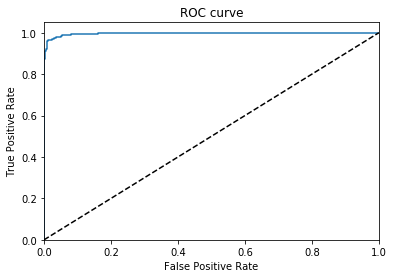

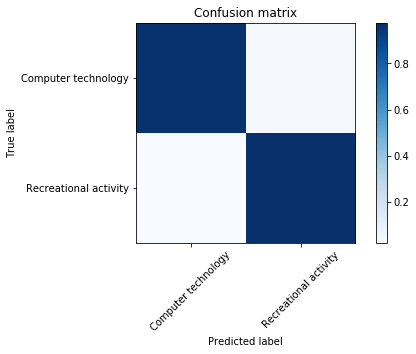

Normalized confusion matrix
[[ 0.97  0.03]
 [ 0.03  0.97]]
                       precision    recall  f1-score   support

  Computer technology       0.98      0.97      0.97       513
Recreational activity       0.96      0.97      0.97       433

          avg / total       0.97      0.97      0.97       946

Accurary for k from -3 to 4
[0.45771670190274844, 0.45771670190274844, 0.45771670190274844, 0.9418604651162791, 0.96723044397463, 0.9682875264270613, 0.9704016913319239]


In [12]:
svm_cross_valid(Dk_train, label_train)

### Hyperparameter tuning for SVM with NMF data

Iteration k=-3
Iteration k=-2
Iteration k=-1
Iteration k=0
Iteration k=1
Iteration k=2
Iteration k=3


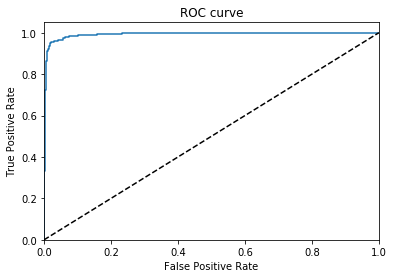

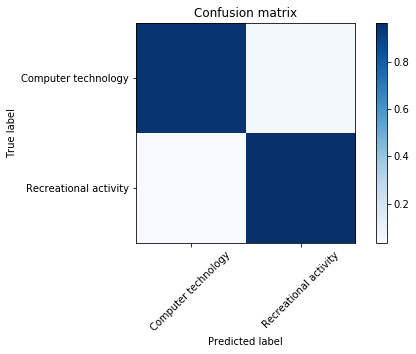

Normalized confusion matrix
[[ 0.95  0.05]
 [ 0.03  0.97]]
                       precision    recall  f1-score   support

  Computer technology       0.97      0.95      0.96       513
Recreational activity       0.94      0.97      0.95       433

          avg / total       0.95      0.95      0.95       946

Accurary for k from -3 to 4
[0.45771670190274844, 0.45771670190274844, 0.45771670190274844, 0.45771670190274844, 0.9101479915433404, 0.9492600422832981, 0.9545454545454546]


In [13]:
svm_cross_valid(NMF_train, label_train)

### Gaussian naive Bayes classifier with LSI data

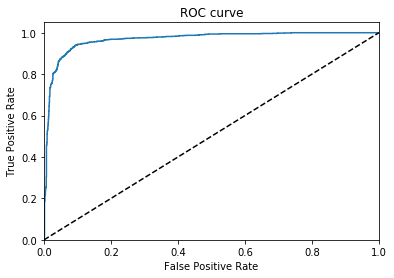

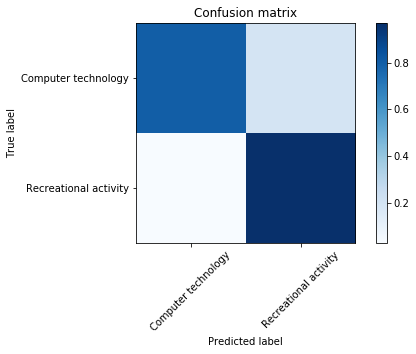

Normalized confusion matrix
[[ 0.8   0.2 ]
 [ 0.03  0.97]]
                       precision    recall  f1-score   support

  Computer technology       0.96      0.80      0.87      1560
Recreational activity       0.83      0.97      0.89      1590

          avg / total       0.90      0.89      0.88      3150



In [14]:
naive_bayes(Dk_train, label_train, Dk_test, label_test)

### Gaussian naive Bayes classifier with NMF data

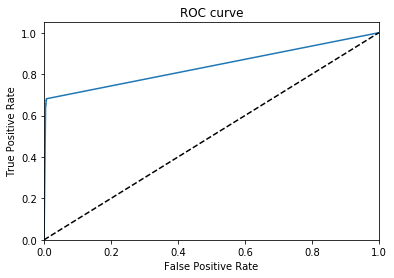

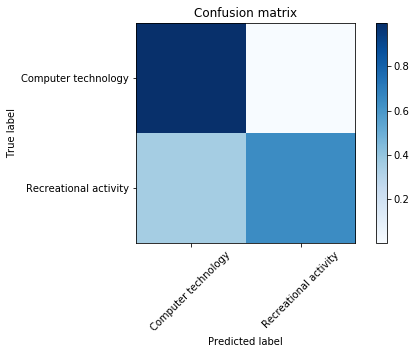

Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.36  0.64]]
                       precision    recall  f1-score   support

  Computer technology       0.73      1.00      0.84      1560
Recreational activity       0.99      0.64      0.78      1590

          avg / total       0.86      0.82      0.81      3150



In [15]:
naive_bayes(NMF_train, label_train, NMF_test, label_test)

### Logistic regression with LSI data

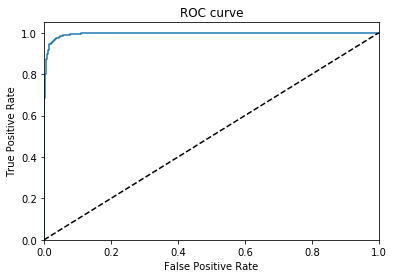

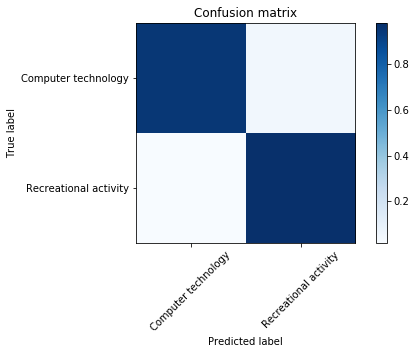

Normalized confusion matrix
[[ 0.95  0.05]
 [ 0.02  0.98]]
                       precision    recall  f1-score   support

  Computer technology       0.98      0.95      0.97      1560
Recreational activity       0.96      0.98      0.97      1590

          avg / total       0.97      0.97      0.97      3150



In [16]:
log_reg(Dk_train, label_train, Dk_test, label_test)

### Logistic regression with NMF data

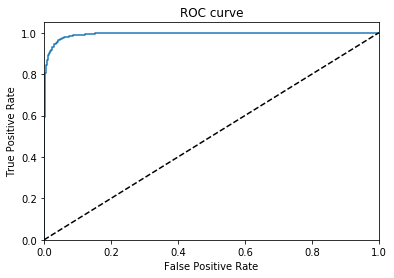

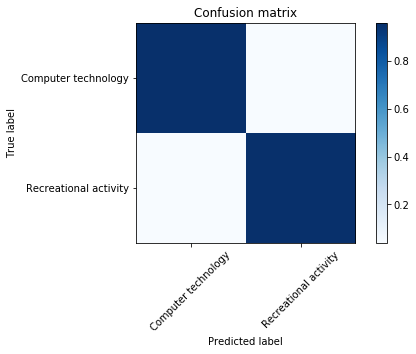

Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.04  0.96]]
                       precision    recall  f1-score   support

  Computer technology       0.96      0.96      0.96      1560
Recreational activity       0.96      0.96      0.96      1590

          avg / total       0.96      0.96      0.96      3150



In [17]:
log_reg(NMF_train, label_train, NMF_test, label_test)

### Logistic regression with different penalties, LSI data

In [18]:
lr_reg(Dk_train, label_train, Dk_test, label_test)

Accuracy for l1 regularization: [0.4952, 0.9025, 0.9413, 0.9708, 0.9737, 0.973, 0.973]
Accuracy for l2 regularization: [0.7375, 0.939, 0.9606, 0.9667, 0.9743, 0.9727, 0.973]


### Logistic regression with different penalties, NMF data

In [19]:
lr_reg(NMF_train, label_train, NMF_test, label_test)

Accuracy for l1 regularization: [0.4952, 0.4952, 0.5565, 0.7187, 0.8302, 0.8813, 0.8883]
Accuracy for l2 regularization: [0.7368, 0.9489, 0.9549, 0.9594, 0.9597, 0.9486, 0.9067]


## Multiclass classification

In [20]:
categories =['comp.sys.ibm.pc.hardware' , 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']
data_train, data_test, label_multi_train, label_multi_test = load_data_multi(categories)
X_train, X_test = TFxIDF(data_train, data_test)
print("training set: #documents: %d, #terms: %d" % (X_train.shape[0], X_train.shape[1]))
print("test set: #documents: %d, #terms: %d" % (X_test.shape[0], X_test.shape[1]))

training set: #documents: 2352, #terms: 5512
test set: #documents: 1565, #terms: 5512


In [21]:
# dimension reduction via LSI
U_k = lsi(X_train, num_feature)
Dk_train = U_k.T * X_train.T
Dk_test = U_k.T * X_test.T
print("dim-reduced training set: # terms: %d, # docs: %d" % (Dk_train.shape[0], Dk_train.shape[1]))
print("dim-reduced test set: # terms: %d, # docs: %d" % (Dk_test.shape[0], Dk_test.shape[1]))
multi_train, multi_test = pre_balance(Dk_train, Dk_test)

# dimension reduction via NMF
NMF_train, NMF_test = nmf(X_train, X_test, num_feature)
print("dim-reduced training set: # terms: %d, # docs: %d" % (NMF_train.shape[0], NMF_train.shape[1]))
print("dim-reduced test set: # terms: %d, # docs: %d" % (NMF_test.shape[0], NMF_test.shape[1]))
multi_nmf_train, multi_nmf_test = pre_balance(NMF_train, NMF_test)

dim-reduced training set: # terms: 50, # docs: 2352
dim-reduced test set: # terms: 50, # docs: 1565
dim-reduced training set: # terms: 50, # docs: 2352
dim-reduced test set: # terms: 50, # docs: 1565


### Multiclass naive Bayes with LSI data

                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.61      0.64      0.63       392
   comp.sys.mac.hardware       0.72      0.46      0.56       385
            misc.forsale       0.64      0.79      0.70       390
  soc.religion.christian       0.93      0.99      0.96       398

             avg / total       0.72      0.72      0.71      1565

[[252  38  83  19]
 [109 177  91   8]
 [ 48  31 307   4]
 [  2   1   2 393]]
0.721405750799


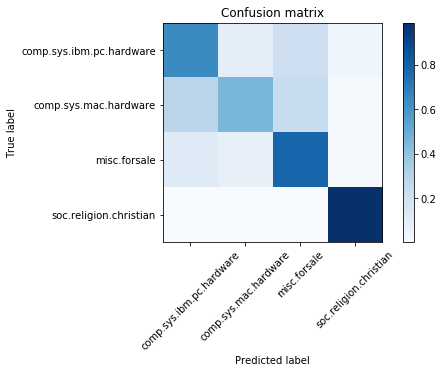

Normalized confusion matrix
[[ 0.64  0.1   0.21  0.05]
 [ 0.28  0.46  0.24  0.02]
 [ 0.12  0.08  0.79  0.01]
 [ 0.01  0.    0.01  0.99]]
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.61      0.64      0.63       392
   comp.sys.mac.hardware       0.72      0.46      0.56       385
            misc.forsale       0.64      0.79      0.70       390
  soc.religion.christian       0.93      0.99      0.96       398

             avg / total       0.72      0.72      0.71      1565



In [22]:
naive_bayes_multi(multi_train, label_multi_train, multi_test, label_multi_test, categories)

### Multiclass naive Bayes with NMF data

                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.80      0.40      0.53       392
   comp.sys.mac.hardware       0.47      0.97      0.63       385
            misc.forsale       0.94      0.50      0.66       390
  soc.religion.christian       1.00      0.90      0.95       398

             avg / total       0.80      0.69      0.69      1565

[[156 231   5   0]
 [  7 374   4   0]
 [ 15 178 196   1]
 [ 16  20   3 359]]
0.693290734824


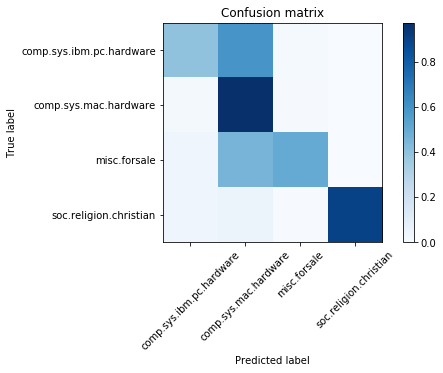

Normalized confusion matrix
[[ 0.4   0.59  0.01  0.  ]
 [ 0.02  0.97  0.01  0.  ]
 [ 0.04  0.46  0.5   0.  ]
 [ 0.04  0.05  0.01  0.9 ]]
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.80      0.40      0.53       392
   comp.sys.mac.hardware       0.47      0.97      0.63       385
            misc.forsale       0.94      0.50      0.66       390
  soc.religion.christian       1.00      0.90      0.95       398

             avg / total       0.80      0.69      0.69      1565



In [23]:
naive_bayes_multi(multi_nmf_train, label_multi_train, multi_nmf_test, label_multi_test, categories)

### One-vs-one SVM with LSI data

                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.83      0.81      0.82       392
   comp.sys.mac.hardware       0.81      0.83      0.82       385
            misc.forsale       0.88      0.88      0.88       390
  soc.religion.christian       0.99      0.99      0.99       398

             avg / total       0.88      0.88      0.88      1565

[[317  49  25   1]
 [ 42 320  23   0]
 [ 20  24 345   1]
 [  3   0   1 394]]


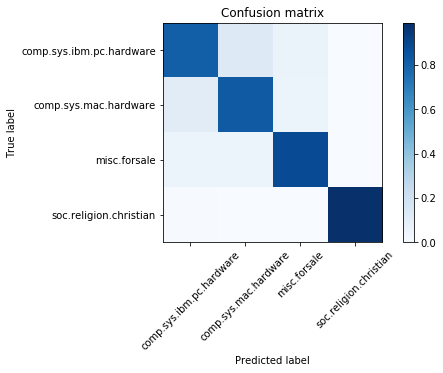

Normalized confusion matrix
[[ 0.81  0.12  0.06  0.  ]
 [ 0.11  0.83  0.06  0.  ]
 [ 0.05  0.06  0.88  0.  ]
 [ 0.01  0.    0.    0.99]]
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.83      0.81      0.82       392
   comp.sys.mac.hardware       0.81      0.83      0.82       385
            misc.forsale       0.88      0.88      0.88       390
  soc.religion.christian       0.99      0.99      0.99       398

             avg / total       0.88      0.88      0.88      1565



In [24]:
svm_one(multi_train, label_multi_train, multi_test, label_multi_test, data_test, categories)

### One-vs-one SVM with NMF data

                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.94      0.19      0.31       392
   comp.sys.mac.hardware       0.53      0.96      0.68       385
            misc.forsale       0.87      0.90      0.88       390
  soc.religion.christian       1.00      0.96      0.98       398

             avg / total       0.84      0.75      0.72      1565

[[ 74 282  36   0]
 [  3 371  11   0]
 [  2  37 350   1]
 [  0  10   5 383]]


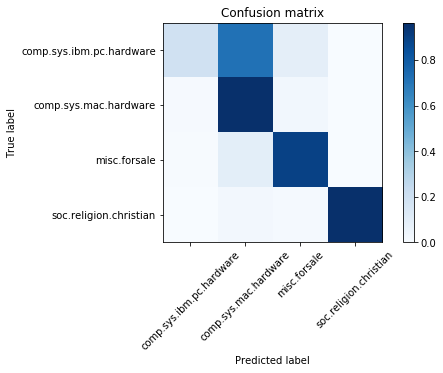

Normalized confusion matrix
[[ 0.19  0.72  0.09  0.  ]
 [ 0.01  0.96  0.03  0.  ]
 [ 0.01  0.09  0.9   0.  ]
 [ 0.    0.03  0.01  0.96]]
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.94      0.19      0.31       392
   comp.sys.mac.hardware       0.53      0.96      0.68       385
            misc.forsale       0.87      0.90      0.88       390
  soc.religion.christian       1.00      0.96      0.98       398

             avg / total       0.84      0.75      0.72      1565



In [25]:
svm_one(multi_nmf_train, label_multi_train, multi_nmf_test, label_multi_test, data_test, categories)

### One-vs-rest SVM with LSI data

                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.85      0.80      0.82       392
   comp.sys.mac.hardware       0.82      0.84      0.83       385
            misc.forsale       0.87      0.89      0.88       390
  soc.religion.christian       0.98      0.99      0.99       398

             avg / total       0.88      0.88      0.88      1565

[[313  50  27   2]
 [ 35 323  26   1]
 [ 19  20 348   3]
 [  3   0   1 394]]


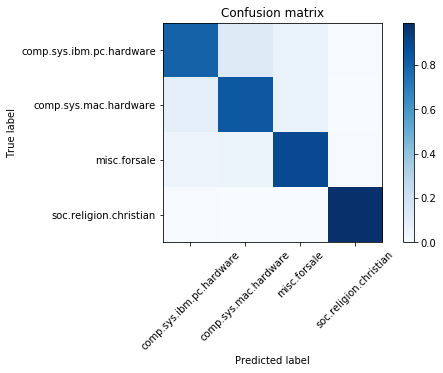

Normalized confusion matrix
[[ 0.8   0.13  0.07  0.01]
 [ 0.09  0.84  0.07  0.  ]
 [ 0.05  0.05  0.89  0.01]
 [ 0.01  0.    0.    0.99]]
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.85      0.80      0.82       392
   comp.sys.mac.hardware       0.82      0.84      0.83       385
            misc.forsale       0.87      0.89      0.88       390
  soc.religion.christian       0.98      0.99      0.99       398

             avg / total       0.88      0.88      0.88      1565



In [26]:
svm_rest(multi_train, label_multi_train, multi_test, label_multi_test, data_test, categories)

### One-vs-rest SVM with NMF data

                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.93      0.14      0.24       392
   comp.sys.mac.hardware       0.49      0.98      0.65       385
            misc.forsale       0.94      0.83      0.88       390
  soc.religion.christian       0.99      0.96      0.98       398

             avg / total       0.84      0.73      0.69      1565

[[ 55 319  18   0]
 [  2 379   4   0]
 [  2  61 325   2]
 [  0  14   0 384]]


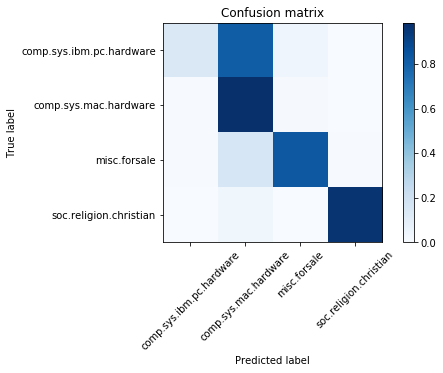

Normalized confusion matrix
[[ 0.14  0.81  0.05  0.  ]
 [ 0.01  0.98  0.01  0.  ]
 [ 0.01  0.16  0.83  0.01]
 [ 0.    0.04  0.    0.96]]
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.93      0.14      0.24       392
   comp.sys.mac.hardware       0.49      0.98      0.65       385
            misc.forsale       0.94      0.83      0.88       390
  soc.religion.christian       0.99      0.96      0.98       398

             avg / total       0.84      0.73      0.69      1565



In [27]:
svm_rest(multi_nmf_train, label_multi_train, multi_nmf_test, label_multi_test, data_test, categories)

## TFxICF

In [28]:
TFxICF(data_train, categories, N)

Ten most significant terms in  comp.sys.ibm.pc.hardware
Rank 1: drive
Rank 2: scsi
Rank 3: edu
Rank 4: 1
Rank 5: s
Rank 6: 2
Rank 7: use
Rank 8: line
Rank 9: com
Rank 10: subject
Ten most significant terms in  comp.sys.mac.hardware
Rank 1: edu
Rank 2: line
Rank 3: s
Rank 4: mac
Rank 5: subject
Rank 6: organ
Rank 7: t
Rank 8: 1
Rank 9: use
Rank 10: appl
Ten most significant terms in  misc.forsale
Rank 1: 1
Rank 2: edu
Rank 3: 2
Rank 4: 00
Rank 5: line
Rank 6: subject
Rank 7: organ
Rank 8: sale
Rank 9: 3
Rank 10: 5
Ten most significant terms in  soc.religion.christian
Rank 1: s
Rank 2: god
Rank 3: christian
Rank 4: t
Rank 5: edu
Rank 6: christ
Rank 7: church
Rank 8: jesus
Rank 9: subject
Rank 10: peopl
